<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/MLLAB-Project/Assignment2/q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a Bagging classifier model with 200 estimators (the base model will be a
decision tree classifier). Also tune the model using GridSearch CV for the optimum
value of max depth. Report the accuracies before and after hyperparameter tuning.
[Marks: 15]
(b) Classify the data using a Gradient Boosting Classifier with 100 estimators. Tune the
model using GridSearch CV for the optimum value of max depth and max leaf nodes.
Report the accuracies before and after hyperparameter tuning. [Marks: 15]
(c) Compare and plot the performances of the models built. [Marks: 10]

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
dataset = "./diabetes.csv"
df = pd.read_csv(dataset)


In [86]:
# dataset = "./data/problem2/diabetes.csv"
# df = pd.read_csv(dataset)

In [87]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=12)

In [89]:
(X_train , X_test , y_test ,y_train)

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 483            0       84             82             31      125  38.2   
 215           12      151             70             40      271  41.8   
 346            1      139             46             19       83  28.7   
 692            2      121             70             32       95  39.1   
 577            2      118             80              0        0  42.9   
 ..           ...      ...            ...            ...      ...   ...   
 145            0      102             75             23        0   0.0   
 222            7      119              0              0        0  25.2   
 148            5      147             78              0        0  33.7   
 614           11      138             74             26      144  36.1   
 736            0      126             86             27      120  27.4   
 
      DiabetesPedigreeFunction  Age  
 483                     0.233   23  
 215                  

In [90]:
zero_counts = {}
imputable_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in imputable_columns:
    zero_count = (df[column] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    zero_counts[column] = (zero_count, zero_percentage)

# Display zero counts and percentages
print("Zero values in each column:")
for column, (count, percentage) in zero_counts.items():
    print(f"{column}: {count} zeros ({percentage:.2f}%)")

Zero values in each column:
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)


In [91]:
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

In [92]:
for cols in imputable_columns:
  median_val =  X_train.loc[X_train[cols]!=0, cols].median()  # calculating the median value where the values are not zero
  X_train_imputed.loc[X_train_imputed[cols]==0,cols] = median_val
  X_test_imputed.loc[X_test_imputed[cols]==0,cols] = median_val

  print(f"Column: {cols}, Non-zero median: {median_val}")

Column: Glucose, Non-zero median: 117.0
Column: BloodPressure, Non-zero median: 72.0
Column: SkinThickness, Non-zero median: 30.0
Column: Insulin, Non-zero median: 130.0


In [93]:
X_imputed = pd.concat([X_train_imputed, X_test_imputed])
print("\nBefore imputation statistics:")
print(df[imputable_columns].describe())

print("\nAfter imputation statistics:")
print(X_imputed[imputable_columns].describe())


Before imputation statistics:
          Glucose  BloodPressure  SkinThickness     Insulin
count  768.000000     768.000000     768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479
std     31.972618      19.355807      15.952218  115.244002
min      0.000000       0.000000       0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000
50%    117.000000      72.000000      23.000000   30.500000
75%    140.250000      80.000000      32.000000  127.250000
max    199.000000     122.000000      99.000000  846.000000

After imputation statistics:
          Glucose  BloodPressure  SkinThickness     Insulin
count  768.000000     768.000000     768.000000  768.000000
mean   121.656250      72.386719      29.403646  143.106771
std     30.438286      12.096642       8.799436   85.975977
min     44.000000      24.000000       7.000000   14.000000
25%     99.750000      64.000000      25.000000  121.500000
50%    117.000000      72.000000      3

In [94]:
# Bagging classifier

bagging_clf = BaggingClassifier(
      estimator=DecisionTreeClassifier(random_state=12),
      n_estimators=200,
      random_state=12,
      n_jobs=-1)

bagging_clf.fit(X_train_imputed, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=12),
                  n_estimators=200, n_jobs=-1, random_state=12)

In [95]:
y_pred_bagging = bagging_clf.predict(X_test)
initial_accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Initial Accuracy (Before Tuning):", initial_accuracy_bagging)

Initial Accuracy (Before Tuning): 0.7316017316017316


In [96]:
param_grid = {
    'estimator__max_depth': [3, 5, 10, 15, None]  # Tuning max_depth of Decision Tree
}

In [97]:
grid_search = GridSearchCV(BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                             n_estimators=200, random_state=42, n_jobs=-1),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         n_estimators=200, n_jobs=-1,
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [3, 5, 10, 15, None]},
             scoring='accuracy')

In [98]:
print("Best max_depth:", grid_search.best_params_)

Best max_depth: {'estimator__max_depth': 3}


In [99]:
# now training with this depth

best_bagging_clf = grid_search.best_estimator_
y_pred_opt_bagging = best_bagging_clf.predict(X_test_imputed)

In [100]:
# Optimised model accuracy

optimized_accuracy_bagging = accuracy_score(y_test, y_pred_opt_bagging)
print("Optimized Accuracy (After Tuning):", optimized_accuracy_bagging)

Optimized Accuracy (After Tuning): 0.7965367965367965


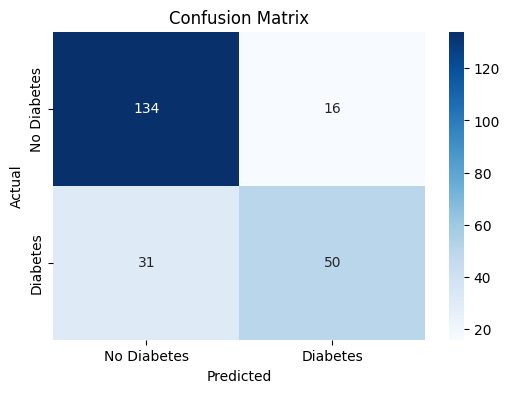

In [101]:
conf_matrix = confusion_matrix(y_test, y_pred_opt_bagging)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [102]:
print("Classification Report:\n", classification_report(y_test, y_pred_opt_bagging))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [103]:
# part b


In [104]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=12)
gbc.fit(X_train_imputed, y_train)

GradientBoostingClassifier(random_state=12)

In [105]:
y_pred_gbc = gbc.predict(X_test_imputed)
initial_accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Initial Accuracy (Before Tuning):", initial_accuracy_gbc)

Initial Accuracy (Before Tuning): 0.7965367965367965


In [106]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'max_leaf_nodes': [10, 20, 30, None]
}

In [107]:
grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=100, random_state=12),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [10, 20, 30, None]},
             scoring='accuracy')

In [108]:
print("Best Parameters for Boosting Classifier:", grid_search.best_params_)

Best Parameters for Boosting Classifier: {'max_depth': 3, 'max_leaf_nodes': 10}


In [109]:
best_gbc = grid_search.best_estimator_
y_pred_opt_gbc = best_gbc.predict(X_test_imputed)

In [110]:
optimized_accuracy_gbc = accuracy_score(y_test, y_pred_opt_gbc)
print("Optimized Accuracy (After Tuning):", optimized_accuracy_gbc)

Optimized Accuracy (After Tuning): 0.7922077922077922


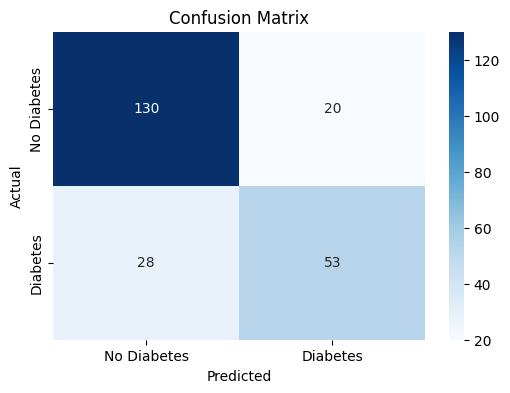

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred_opt_gbc)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [112]:
print("Classification Report:\n", classification_report(y_test, y_pred_opt_gbc))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       150
           1       0.73      0.65      0.69        81

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



In [113]:
# part c

In [114]:
# we have 4 models , 2 of each kind and one before and after

model_names = ["Bagging (Before Tuning)", "Bagging (After Tuning)",
               "Gradient Boosting (Before Tuning)", "Gradient Boosting (After Tuning)"]

accuracies = [initial_accuracy_bagging, optimized_accuracy_bagging,
              initial_accuracy_gbc, optimized_accuracy_gbc]

<ipython-input-115-b9aa6e04e2de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


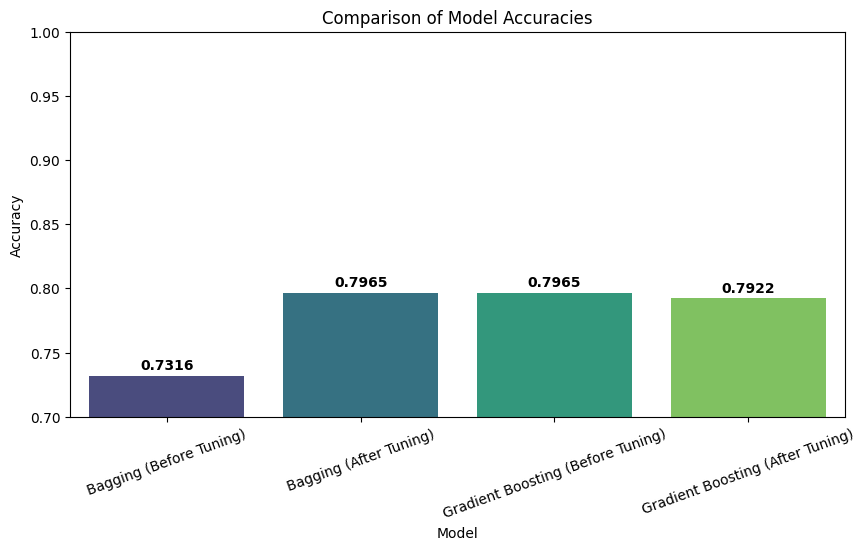

In [115]:
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=20)
plt.ylim(0.7, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")
plt.show()

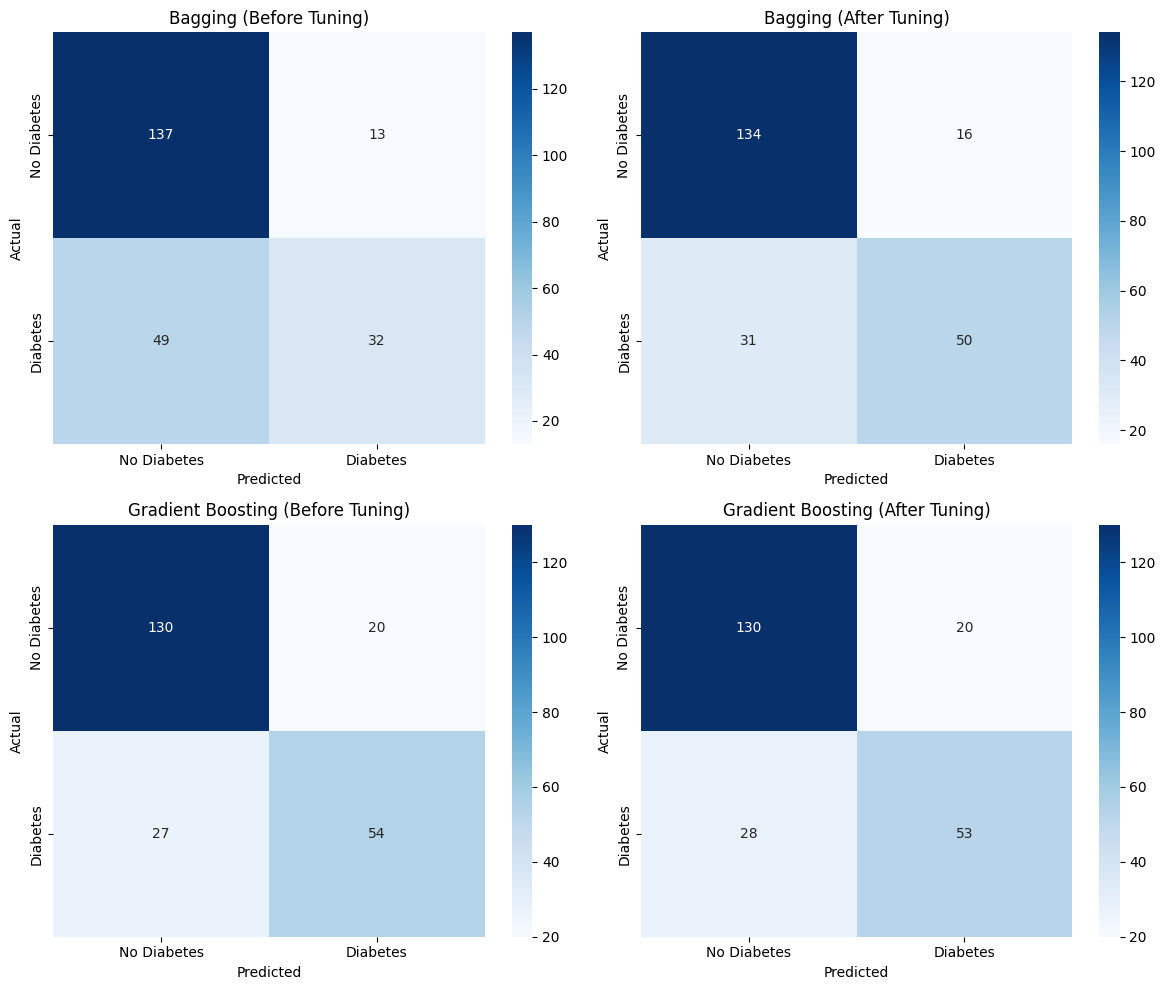

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
models = [y_pred_bagging, y_pred_opt_bagging, y_pred_gbc, y_pred_opt_gbc]
titles = ["Bagging (Before Tuning)", "Bagging (After Tuning)",
          "Gradient Boosting (Before Tuning)", "Gradient Boosting (After Tuning)"]

for i, ax in enumerate(axes.flatten()):
    conf_matrix = confusion_matrix(y_test, models[i])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"], ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()